In [1]:
pip install opencv-python matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.feature import greycomatrix,greycoprops

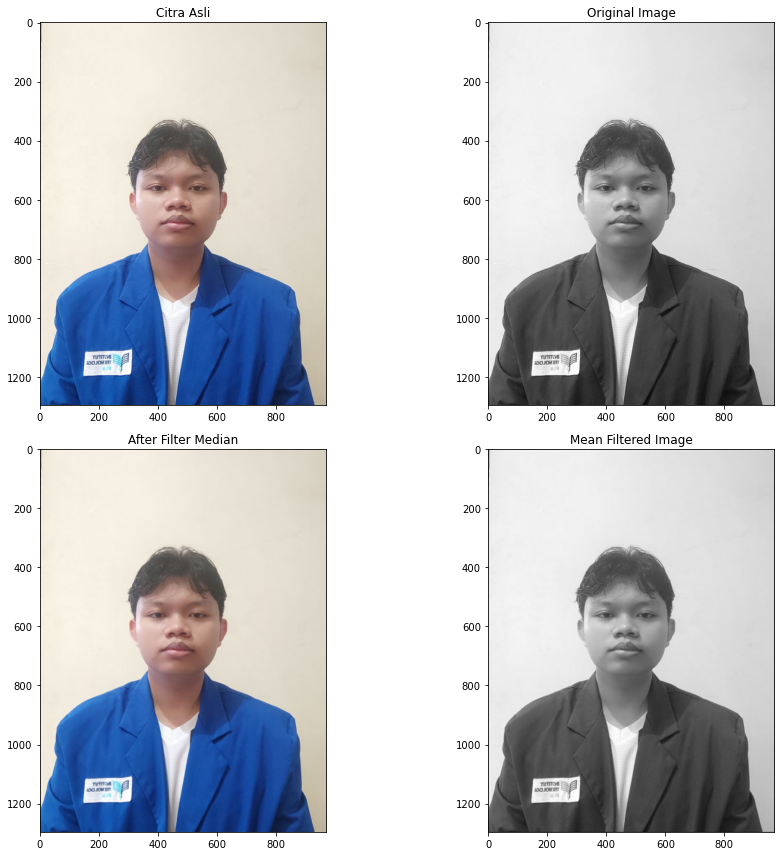

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

# Fungsi untuk mean filter manual
def mean_filter(image, kernel_size=3):
    padded_image = np.pad(image, ((kernel_size // 2, kernel_size // 2), (kernel_size // 2, kernel_size // 2)), mode='constant')
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_size, j:j + kernel_size]
            filtered_image[i, j] = np.mean(region)
    
    return filtered_image

# Load image using skimage
image_path = 'Galih_Raka_Siwi.jpg'
img = io.imread(image_path)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply median filter using OpenCV
median_filtered = cv2.medianBlur(img, 5)

# Apply mean filter
mean_filtered_gray = mean_filter(img_gray, kernel_size=3)
mean_filtered_rgb = cv2.cvtColor(mean_filtered_gray, cv2.COLOR_GRAY2RGB)

# Plotting images
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
ax = axs.ravel()

ax[0].imshow(img)
ax[0].set_title('Citra Asli')


ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title('Original Image')


ax[2].imshow(median_filtered)
ax[2].set_title('After Filter Median')


ax[3].imshow(mean_filtered_rgb)
ax[3].set_title('Mean Filtered Image')


plt.tight_layout()
plt.show()


In [4]:
mean = np.mean(img_gray.ravel())
std = np.std(img_gray.ravel())

print(mean,std)

172.94590810742014 73.06642744068125


In [5]:
glcm = greycomatrix(img_gray,
                   distances=[1],
                   angles=[0],
                   levels = 256,
                   symmetric=True,
                   normed=True)
#gray level cooccurence matrix

In [6]:
contrast = greycoprops(glcm, 'contrast')[0,0]
dissimilarity = greycoprops(glcm, 'dissimilarity')[0,0]
homogeneity = greycoprops(glcm, 'homogeneity')[0,0]
energy = greycoprops(glcm, 'energy')[0,0]
correlation = greycoprops(glcm, 'correlation')[0,0]

In [7]:
print('contrast \t: %04f'
     % greycoprops(glcm, 'contrast')[0,0])
print('dissimilarity \t: %04f'
     % greycoprops(glcm, 'dissimilarity')[0,0])
print('homogeneity \t: %04f'
     % greycoprops(glcm, 'homogeneity')[0,0])
print('energy \t: %04f'
     % greycoprops(glcm, 'energy')[0,0])
print('correlation \t: %04f'
     % greycoprops(glcm, 'correlation')[0,0])

contrast 	: 33.094838
dissimilarity 	: 1.560362
homogeneity 	: 0.714875
energy 	: 0.099358
correlation 	: 0.996902
